**Desafio 1**

In [58]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
df = pd.read_csv('Credit.csv')

In [60]:
df.sample()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
221,222,98.515,8760,633,5,78,11,Female,No,No,African American,1230


In [61]:
df=df.drop('Unnamed: 0', axis = 1)

In [62]:
df.sample()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
336,32.856,5884,438,4,68,13,Male,No,No,Caucasian,926


In [63]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [64]:
binarias = pd.get_dummies(df['Ethnicity'])

In [65]:
df = pd.concat([df,binarias], axis=1)

In [66]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,1,0,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0,0,1
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1


**Desafio 2**

In [67]:
def plot_hist(data,variable):
    sns.displot(data[variable])
    plt.axvline(np.mean(data[variable]), color='tomato', label='Media')
    plt.axvline(np.median(data[variable]), color ='grey', label='Mediana')
    plt.title(variable, fontdict={'fontsize':30})
    plt.legend()
    plt.show()
    

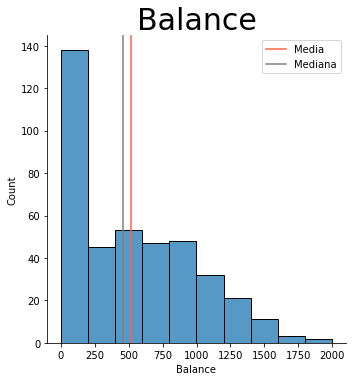

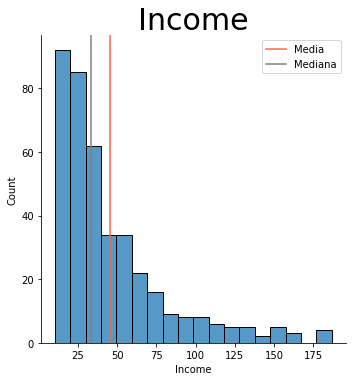

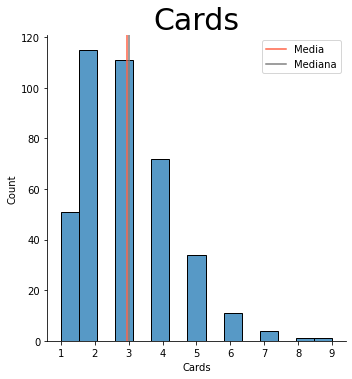

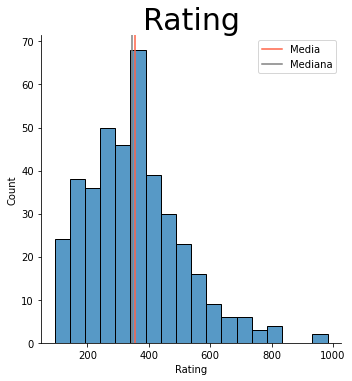

In [68]:
for categoria in ['Balance', 'Income', 'Cards', 'Rating']:
    plot_hist(df, categoria)

Balance, Income y Cards tienen un comportamiento alejado de la distribucion normal. 
Rating presenta mas normalidad en su comportamiento.

**Desafio 3**

In [69]:
modelo1=smf.ols('Balance ~ Student', data = df).fit()
modelo2=smf.ols('Balance ~ Income', data = df).fit()
modelo3=smf.ols('Balance ~ Rating', data = df).fit()

In [70]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.49e-07
Time:                        11:42:04   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.03e-22
Time:                        11:42:04   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          1.90e-120
Time:                        11:42:04   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***¿Qué variable presenta un mayor poder explicativo de la variabilidad de
Balance?***

La variable que presente un mayor poder explicativo de la variabilidad de Balance es Rating (Ranking de credito) con R-Square = 0.746

***¿Qué podemos decir sobre el comportamiento de Student?***

Que no es capaz de explicar la variabilidad de Balance, R-Square = 0.067

***¿Qué pasa si aplicamos una prueba de hipotesis para muestras
independientes de Balance entre aquellos que son y no son
estudiantes?***

In [73]:
yes_no_student=pd.get_dummies(df['Student'])

In [74]:
df = pd.concat([df, yes_no_student], axis = 1)

In [75]:
df.rename(columns={'No':'No_student','Yes':'Yes_student'}, inplace=True)

In [76]:
model_student=smf.ols('Balance ~ Yes_student', data=df).fit()

In [77]:
model_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.49e-07
Time:                        11:42:07   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Yes_student   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respondiendo a la pregunta anterior, el reporte no indica que ser o no ser estudiante explica un 6,7% el comportamiento de Balance. Por lo que no es una variable relevante.

**Desafio 4**

In [78]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian,No_student,Yes_student
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,1,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,1,0
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,1,0,0,1,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0,0,1,1,0
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,1,0


In [79]:
gender=pd.get_dummies(df['Gender'])

In [80]:
married=pd.get_dummies(df['Married'])

In [81]:
df = pd.concat([df, gender, married], axis =1)

In [82]:
df.rename(columns={'No': 'No_married', 'Yes':'Yes_married', 'African American': 'African_American', ' Male':'Male'}, inplace=True)

In [83]:
df

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African_American,Asian,Caucasian,No_student,Yes_student,Male,Female,No_married,Yes_married
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,1,0,1,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1,0,0,1,0,1,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0,1,0,1,0,1,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0,1,0,1,0,0,1,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560,0,0,1,1,0,1,0,0,1
396,13.364,3838,296,5,65,17,Male,No,No,African American,480,1,0,0,1,0,1,0,1,0
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138,0,0,1,1,0,0,1,0,1
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0,0,0,1,1,0,1,0,0,1


In [84]:
modelo_todos = smf.ols('Balance ~ Limit+Rating+Cards+Age+Education+African_American+Asian+Caucasian+No_student+Yes_student+Male+Female+No_married+Yes_married', data=df)

In [85]:
modelo_todos = modelo_todos.fit()

In [86]:
modelo_todos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     185.5
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.66e-141
Time:                        11:42:11   Log-Likelihood:                -2668.8
No. Observations:                 400   AIC:                             5360.
Df Residuals:                     389   BIC:                             5404.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -37.8776     23.875     -1.587      0.113     -84.817       9.062
Limit                0.1681      0.064      2.614      0.009       0.042       0.295
Rating               0.0832      0.961      0.087      0.931      -1.807       1.973
Cards               29.0458      8.492      3.420      0.001      12.350      45.742
Age                 -2.2051      0.569     -3.874      0.000      -3.324      -1.086
Education           -0.0329      3.135     -0.010      0.992      -6.196       6.131
African_American   -23.0326     17.853     -1.290      0.198     -58.134      12.068
Asian              -10.0491     16.916     -0.594      0.553     -43.308      23.210
Caucasian           -4.7958     14.854     -0.323      0.747     -34.000      24.408
No_student        -219.9916     17.700    -12.429      0.000    -254.791    -185.192
Yes_student        182.1140     22.564      8.071      0.000     137.752     226.476
Male               -19.5150     15.558     -1.254      0.210     -50.103      11.073
Female             -18.3626     15.230     -1.206      0.229     -48.305      11.580
No_married          -9.8406     15.357     -0.641      0.522     -40.034      20.352
Yes_married        -28.0369     15.992     -1.753      0.080     -59.479       3.405
==============================================================================
Omnibus:                       11.380   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.572
Skew:                          -0.408   Prob(JB):                      0.00307
Kurtosis:                       3.166   Cond. No.                     9.67e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Se observa que existen regresores con un p_value mayor a 0, lo que indicaria que no son relevantes en el modelo y se podrian quitar.

**Desafio 5**

In [87]:
modelo_todos = smf.ols('Balance ~ Limit+Cards+Age+No_student+Yes_student', data=df).fit()

In [88]:
modelo_todos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     469.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          1.49e-148
Time:                        11:42:12   Log-Likelihood:                -2669.5
No. Observations:                 400   AIC:                             5349.
Df Residuals:                     395   BIC:                             5369.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -70.1696     28.657     -2.449      0.015    -126.509     -13.830
Limit           0.1734      0.004     41.282      0.000       0.165       0.182
Cards          29.4965      7.044      4.188      0.000      15.649      43.344
Age            -2.1829      0.563     -3.878      0.000      -3.289      -1.076
No_student   -237.2115     18.480    -12.836      0.000    -273.542    -200.881
Yes_student   167.0419     24.199      6.903      0.000     119.466     214.617
==============================================================================
Omnibus:                       10.907   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.089
Skew:                          -0.403   Prob(JB):                      0.00391
Kurtosis:                       3.131   Cond. No.                     1.53e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

***¿Mejoró o empeoró el modelo con la reducción de regresores?***

El R-squared del modelo vario un 0,1%, lo que es practicamente 0%. Por lo que se podria deducir que las variables retiradas eran capaces de explicar solo el 0,1% de la variable Balance. Lo que las hace irrelevantes dentro del modelo.

**Desafio 6**

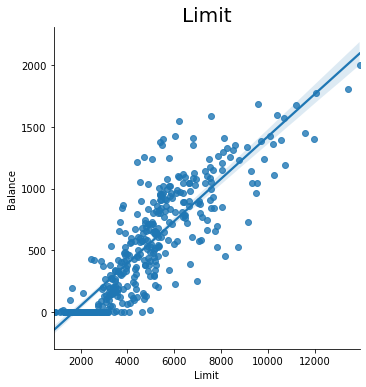

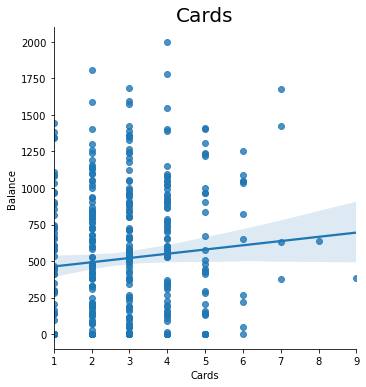

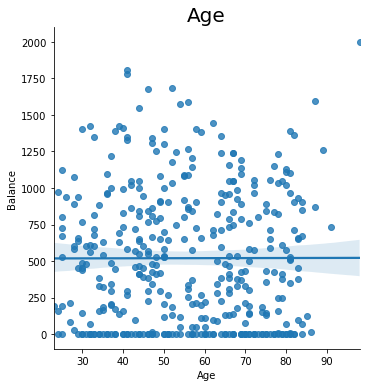

In [90]:
for variable in ['Limit', 'Cards', 'Age']:
    sns.lmplot(x=variable, y = 'Balance', data=df)
    plt.title(variable, fontdict={'fontsize':20})